In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import numpy as np

xlsx = pd.ExcelFile('Dados/PDFJaneiro.xlsx')
df = pd.read_excel(xlsx, 'Planilha1')
#df.set_index('Data',inplace=True)
df = df.rename(columns={"Nr. Ordem" : "Nr. Ordem Abast.","Nr." : "Nr. Lcto Fitcard", "Exerc. Empenho" : "Exerc.", "Unnamed: 9" : "Empenho", "Exerc..1" : "Exerc.", "Tipo.1" : "Tipo Nota Fiscal", "Valor" : "Valor Abast."})
#Tirei o valor ajustado para testar a tabela que representa o mês de Janeiro e nela vários valores da coluna Valor Ajustado estão faltando
df = df.drop(["Lcto", "Exerc.", "Lançamento", "Nr. Ordem Abast.", "Nr. Lcto Fitcard", "Empenho", "Tipo Nota Fiscal", "Serie", "EQAL", "Liquidação", "Numero", "Valor Ajustado"], axis = 1)
df["Nr Litros"] = df["Nr Litros"] / 1000
#Renomeia os nomes dos produtos para facilitar o plot de gráficos
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2019,79417,AJM-9211,Abast,GASOLINA,23.200,99.53
1,02/01/2019,79464,BCD-6525,Abast,ETANOL,41.441,115.62
2,02/01/2019,79466,BCD-6527,Abast,ETANOL,46.090,128.59
3,02/01/2019,79432,ARV-7425,Abast,ETANOL,45.168,126.02
4,02/01/2019,79473,AJU-6529,Abast,DIESEL,104.080,363.24
...,...,...,...,...,...,...,...
237,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
238,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
239,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
240,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [45]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

43.48261570247936

In [47]:
df.sort_values(by="Nr Litros")

,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
Data,,,,,,
2019-01-21,87010,EQU-8710,Consum,GASOLINA,4.279,17.93
2019-04-01,93011,ATW-9412,Abast,GASOLINA,6.140,26.34
2019-01-21,93014,ATW-9372,Abast,GASOLINA,6.621,27.74
2019-11-01,79436,ASZ-6988,Abast,GASOLINA,7.360,30.84
2019-01-17,79437,ASZ-7083,Abast,GASOLINA,7.489,31.38
...,...,...,...,...,...,...
2019-01-29,78012,AKF-2842,Abast,DIESEL,121.209,423.02
2019-01-31,78012,AKF-2842,Abast,DIESEL,126.670,442.08
2019-09-01,79473,AJU-6529,Abast,DIESEL,127.230,444.03


In [48]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
Data,,,,,,
2019-01-18,79473,AJU-6529,Abast,DIESEL,138.891,484.73
2019-11-01,78040,AEO-9326,Abast,DIESEL,135.650,473.42
2019-09-01,79473,AJU-6529,Abast,DIESEL,127.230,444.03
2019-01-31,78012,AKF-2842,Abast,DIESEL,126.670,442.08
2019-01-29,78012,AKF-2842,Abast,DIESEL,121.209,423.02
...,...,...,...,...,...,...
2019-04-01,79459,BCD-6855,Abast,ETANOL,43.731,122.01
2019-01-17,79463,BCD-6524,Abast,ETANOL,43.591,117.26
2019-07-01,79470,BCD-6851,Abast,GASOLINA,43.550,182.47


In [49]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
Data,,,,,,
2019-01-17,79421,AJN-3792,Abast,GASOLINA,58.360,244.53
2019-01-28,79445,ATL-9829,Abast,GASOLINA,53.539,224.33
2019-03-01,92046,ALE-6725,Abast,GASOLINA,52.520,225.31
2019-01-28,79444,ATL-9834,Abast,GASOLINA,51.530,215.91
2019-08-01,79463,BCD-6524,Abast,GASOLINA,50.310,210.80
2019-09-01,77097,AAW-2629,Abast,GASOLINA,50.120,210.00
2019-01-24,92046,ALE-6725,Abast,GASOLINA,49.561,207.66
2019-07-01,79461,BCD-6871,Abast,GASOLINA,49.380,206.90
2019-01-15,79457,BCC-4713,Abast,GASOLINA,48.279,202.29


In [50]:
df["Produto"].value_counts()

ETANOL      115
GASOLINA     84
DIESEL       43
Name: Produto, dtype: int64

In [51]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.475207
GASOLINA    0.347107
DIESEL      0.177686
Name: Produto, dtype: float64

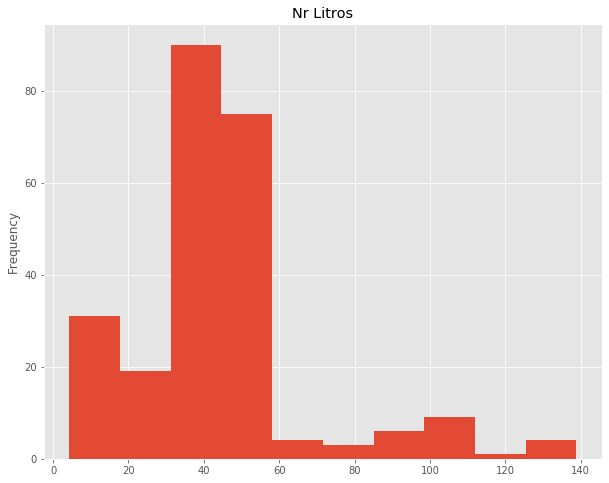

In [126]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

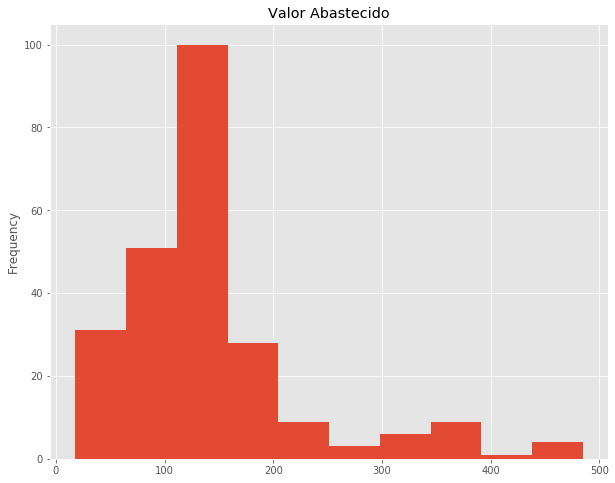

In [113]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [20]:
df["Nr Litros"].describe()

count    242.000000
mean      43.482616
std       23.896279
min        4.279000
25%       34.202500
50%       42.795500
75%       48.917750
max      138.891000
Name: Nr Litros, dtype: float64

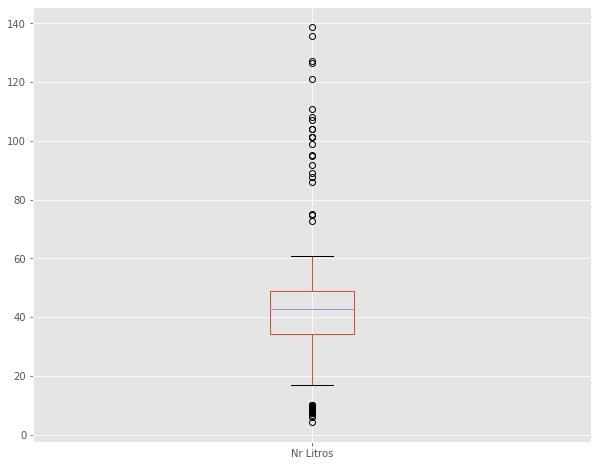

In [112]:
df["Nr Litros"].plot(kind="box")

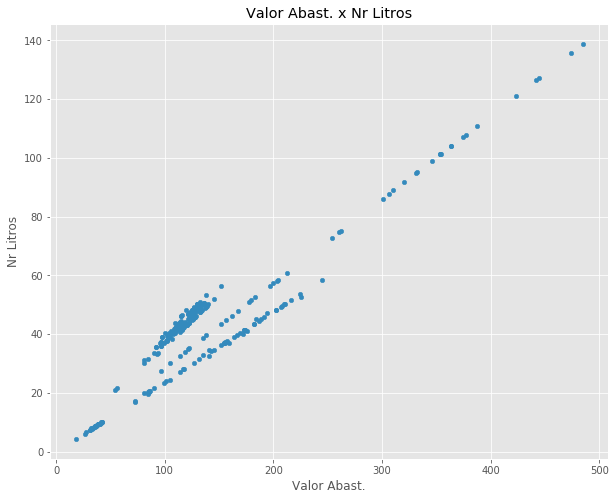

In [111]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

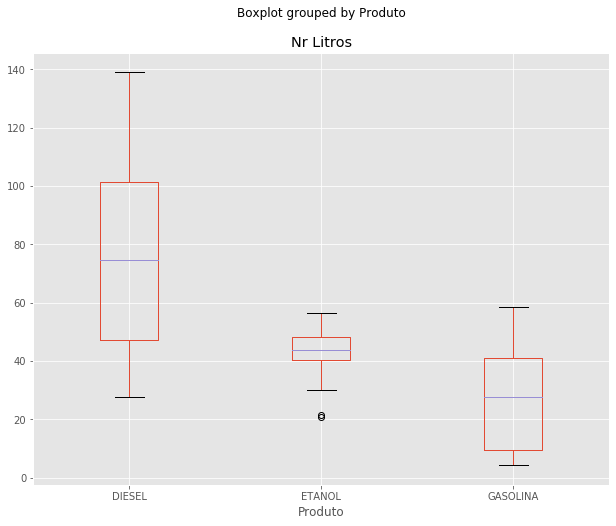

In [110]:
df.boxplot(column="Nr Litros", by="Produto")

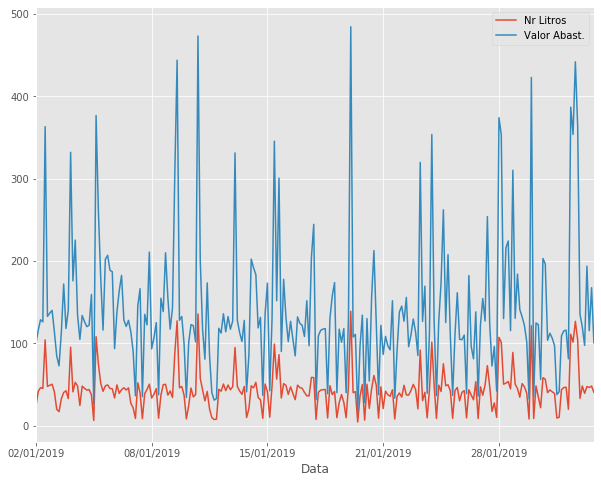

In [128]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

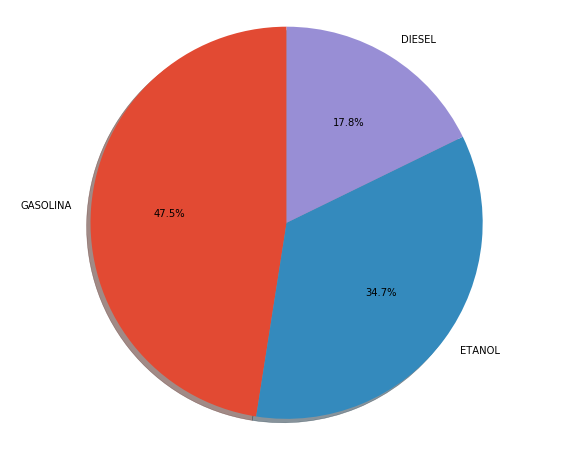

In [109]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

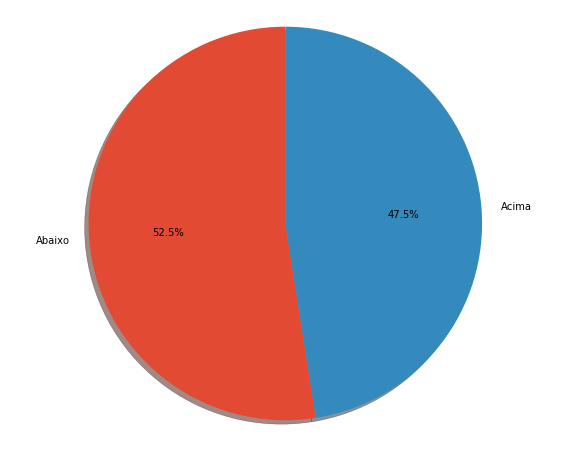

In [108]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

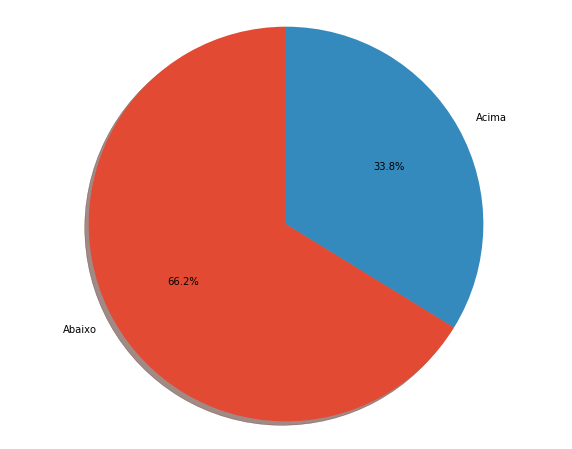

In [107]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

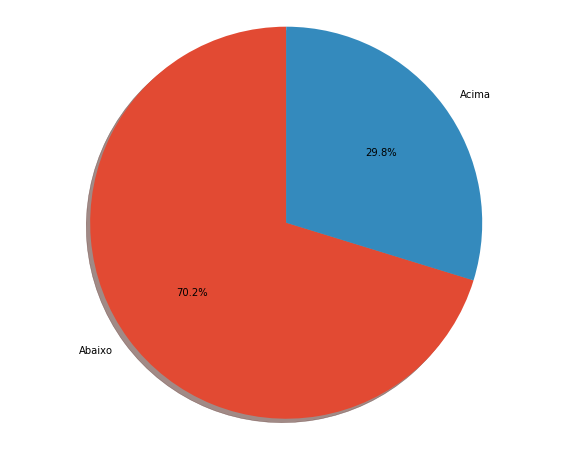

In [106]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

In [153]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Placa')['Nr Litros', 'Valor Abast.'].agg({'Valor Abast.' : 'sum', 'Nr Litros': 'sum'})
         .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Valor Abast.' : 'Valor Abastecido', 'Nr Litros' : 'Número de Litros'})

#fig, ax = plt.subplots()
df.plot(kind='barh', y = "", x ="Data", ax=ax)
#ax.set_xlabel('Número de Litros')
#ax.set_ylabel('Data')

In [132]:
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2019,79417,AJM-9211,Abast,GASOLINA,23.200,99.53
1,02/01/2019,79464,BCD-6525,Abast,ETANOL,41.441,115.62
2,02/01/2019,79466,BCD-6527,Abast,ETANOL,46.090,128.59
3,02/01/2019,79432,ARV-7425,Abast,ETANOL,45.168,126.02
4,02/01/2019,79473,AJU-6529,Abast,DIESEL,104.080,363.24
...,...,...,...,...,...,...,...
237,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
238,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
239,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
240,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49
